1. INSTALLING DEPENDENCIES AND SETUP

In [1]:
pip install tensorflow 


Note: you may need to restart the kernel to use updated packages.


In [2]:

!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.6.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.2
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.53.0
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.64.1
h5py                         3.11.0
idna                         3.7
importlib_metadata           8.0.0
ipykernel                    6.29.5
ipython                      8.26.0
jedi                         0.19.1
jupyter_client               8.6.2
jupyter_core                 5.7.2
kera

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


2. CLEANING IMAGES

In [7]:
import cv2
import imghdr


In [8]:
data_dir = r'C:\Users\amber\OneDrive\Desktop\AIML + DATA SCIENCE\Image_Classification_Using_CNN\data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

3. LOADING DATA

In [11]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
from matplotlib import pyplot as plt


In [14]:

data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\amber\OneDrive\Desktop\AIML + DATA SCIENCE\Image_Classification_Using_CNN\data' )

Found 160 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:

batch = data_iterator.next()

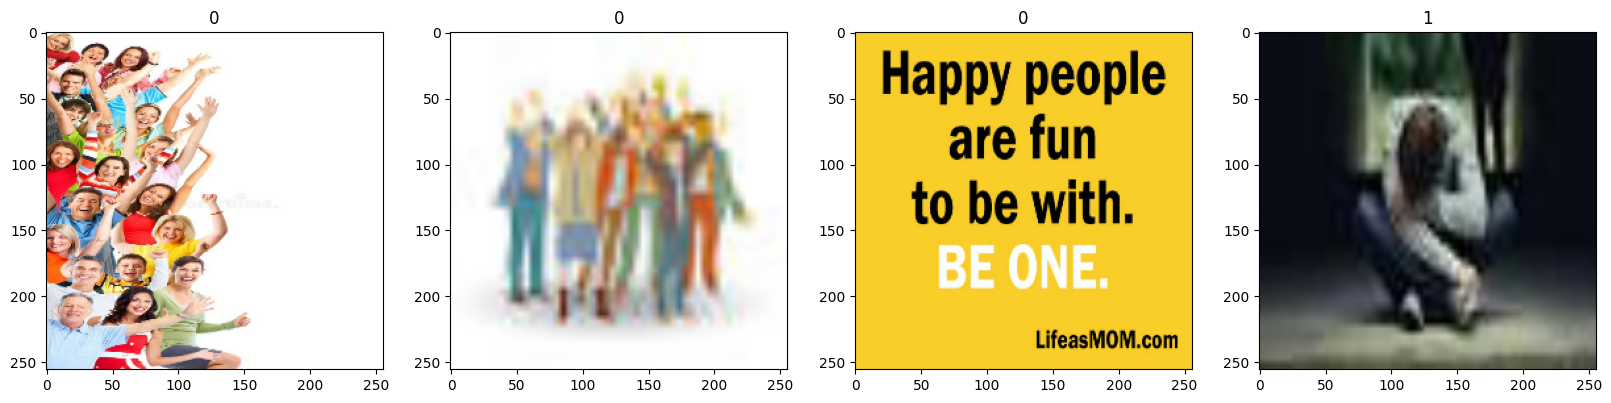

In [17]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. SCALE DATA

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:

data.as_numpy_iterator().next()

(array([[[[8.96139711e-04, 8.96139711e-04, 8.96139711e-04],
          [4.31295969e-02, 4.31295969e-02, 4.31295969e-02],
          [1.11680456e-01, 1.11680456e-01, 1.11680456e-01],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [9.07628704e-03, 9.07628704e-03, 9.07628704e-03],
          [2.98789833e-02, 2.98789833e-02, 2.98789833e-02]],
 
         [[1.79577991e-03, 1.79577991e-03, 1.79577991e-03],
          [5.08918762e-02, 5.08918762e-02, 5.08918762e-02],
          [1.02776319e-01, 1.02776319e-01, 1.02776319e-01],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [1.05949100e-02, 1.05949100e-02, 1.05949100e-02],
          [3.00289225e-02, 3.00289225e-02, 3.00289225e-02]],
 
         [[3.04372446e-03, 3.04372446e-03, 3.04372446e-03],
          [6.15832619e-02, 6.15832619e-02, 6.15832619e-02],
          [9.07684639e-02, 9.07684639e-02, 9.07684639e-02],
          ...,
          [1.49150169e-03, 1.49150169e-03, 1.4915

5. SPLIT DATA

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:

train_size

3

In [22]:
val_size

1

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6. MODEL BUILDING (CNN)

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\amber\anaconda3\envs\py410\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

7. Training 

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=60, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 390ms/step - accuracy: 0.7018 - loss: 1.5253 - val_accuracy: 0.4688 - val_loss: 0.7975
Epoch 2/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.4453 - loss: 0.7954 - val_accuracy: 0.5625 - val_loss: 0.6537
Epoch 3/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.6536 - loss: 0.5832 - val_accuracy: 0.5938 - val_loss: 0.6679
Epoch 4/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.6589 - loss: 0.5538 - val_accuracy: 0.7500 - val_loss: 0.5429
Epoch 5/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.7826 - loss: 0.4960 - val_accuracy: 0.6875 - val_loss: 0.4833
Epoch 6/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.7044 - loss: 0.5111 - val_accuracy: 0.8438 - val_loss: 0.3627
Epoch 7/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.7240 - loss: 0.4702 - val_accuracy: 0.7812 - val_loss: 0.3864
Epoch 8/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.8346 - loss: 0.4354 - val_accuracy: 0.8750 - val_loss:

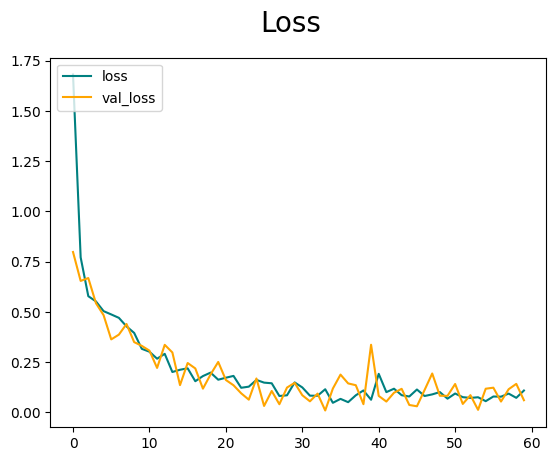

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

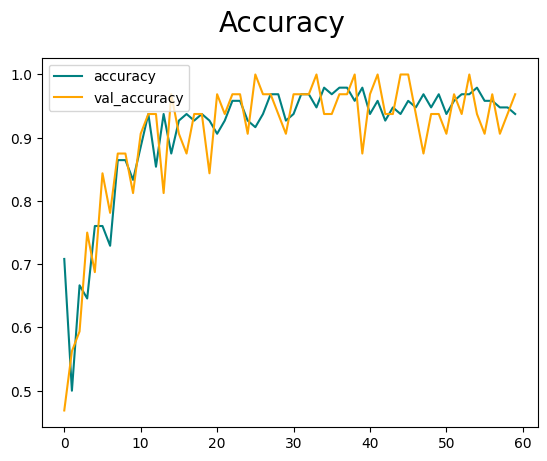

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. MODEL EVALUATION

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


10. TEST

In [39]:
import cv2

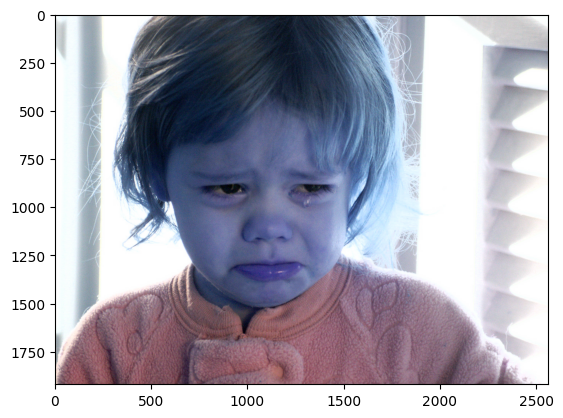

In [61]:
img = cv2.imread('Crying_girl.jpg')
plt.imshow(img)
plt.show()

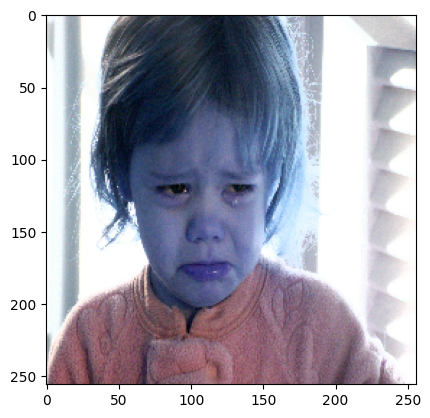

In [62]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [64]:

yhat

array([[0.93707544]], dtype=float32)

In [65]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


11. SAVE THE MODEL

In [66]:
from tensorflow.keras.models import load_model

In [67]:
model.save(os.path.join('models','imageclassifier.h5'))

In [70]:
new_model = load_model('models/imageclassifier.h5')

In [71]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.93707544]], dtype=float32)